In [9]:
import json
import pydicom
import piexif
import csv
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
data_root = Path('..') / "data" / "jpeg-images-train"

In [19]:
def rle2mask(array, width, height):
    mask= np.zeros(width* height)
    if len(array) != 1:
        starts = array[0::2]
        lengths = array[1::2]

        current_position = 0
        for index, start in enumerate(starts):
            current_position += start
            mask[current_position:current_position+lengths[index]] = 255
            current_position += lengths[index]

    return mask.reshape(height, width).T

In [26]:
def read_jpg(path, empty_mask_is_negative=False):
    img = Image.open(path)
    makernote_bytes = piexif.load(img.info["exif"])["Exif"][piexif.ExifIFD.MakerNote]
    attr = json.loads(makernote_bytes.decode("ascii"))

    if empty_mask_is_negative:
        attr['Masks'] = attr.get('Masks', [[-1]])
        
    masks = None
    if 'Masks' in attr:
        masks = [rle2mask(encoded_pixels, img.width, img.height) for encoded_pixels in attr['Masks']]
        del attr['Masks']

    return np.asarray(img), attr, masks

<Figure size 432x288 with 0 Axes>

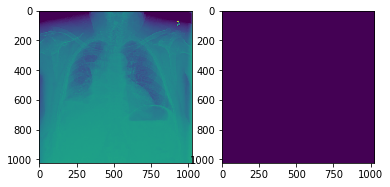

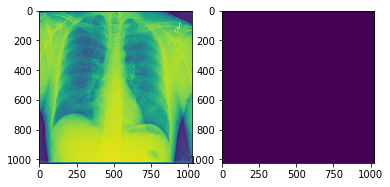

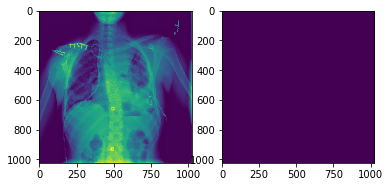

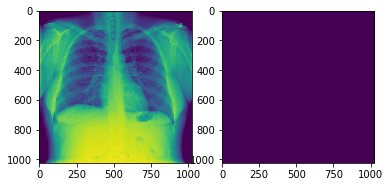

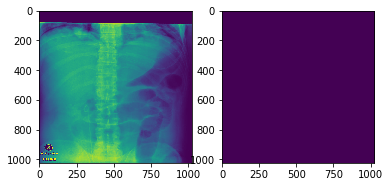

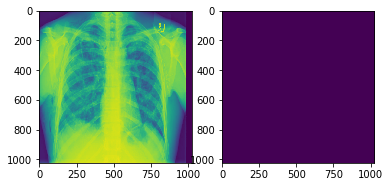

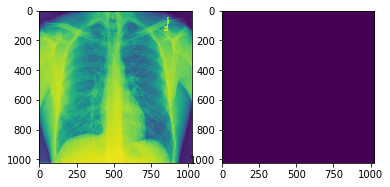

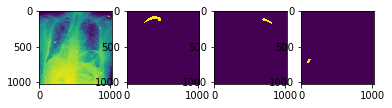

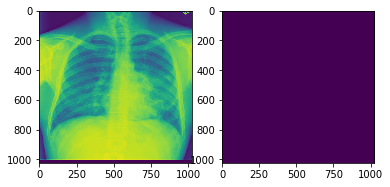

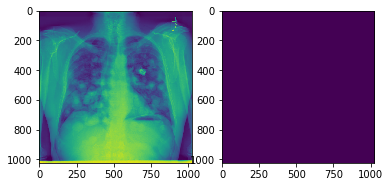

In [32]:
for i, p in enumerate(data_root.glob('*.jpg')):
    pixel_array, attr, masks = read_jpg(p, True)
    plt.figure(i)
    fig, axs = plt.subplots(1, 1 + len(masks))
    axs[0].imshow(pixel_array)
    for j, m in enumerate(masks):
        axs[j+1].imshow(masks[j])
    if 8 < i:
        break
    